## Структура проекта:
1. Открытие файла и изучение общей информации
2. Предобработка данных  
3. Исследовательский анализ данных
4. Составление портрета пользователя каждого региона 
5. Приверка гипотез
6. Общие выводы по проекту

### Шаг 1. Открытие файла с данными и изучение общей информации. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

%matplotlib inline

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.shape

(16715, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


#### ВЫВОД

При первичном изучении данных видим, что в нашем распоряжении данные о почти 17 тыс игр. Мы знаем платформу, для которой игра выпущена, год выпуска, жанр, где она и в каком количестве продана, оценку критиков и пользователей, рейтинг от организации ESRB.


Данные содержат пропуски в столбцах: Year_of_Release, Critic_Score, User_Score, Rating. 2 игры не имеют имени и жанра (скорее всего их можно удалить из датафрейма). Пропуски в годе выпуска и рейтингах нужно посмотреть ближе.

Что касается типов данных, то год выпуска нужно перевести в целочисленный тип, User_Score - в вещественный.

Названия столбцов нужно привести к нижнему регистру, чтобы не путаться при обращении к ним.


### Шаг 2. Предобработка данных

###### Приведем названия столбцов к нижнему регистру, используя List Comprehension

In [7]:
df.columns = [column.lower() for column in df.columns]

###### Работа с пропускамии и типами данных

Удалим 2 игры, у которых пропущено название, 2 строчки не исказят общую картину

In [8]:
df = df.dropna(subset=['name'])

In [9]:
df.shape

(16713, 11)

**year_of_release**

В датафрейме представлены данные с 1980 по 2016 гг. Довольно много пропусков в годе выпуска игры. Думаю, что замена медианой, модой или чем-то еще не корректна и сильно повлияет на результаты, например, прибыль по проданным играм за год. 

По гистограмме видим, что распределение Пуассоновское. Много игр выпускалось в 2005-2010 гг.

In [11]:
df['year_of_release'].min(), df['year_of_release'].max()

(1980.0, 2016.0)

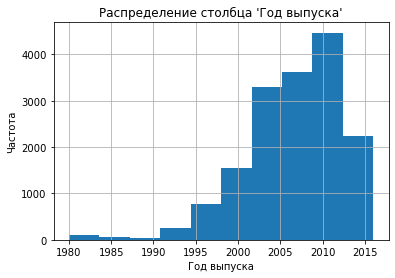

In [12]:
df['year_of_release'].plot(kind='hist');
plt.grid(True)
plt.figsize=(10, 6)
plt.title("Распределение столбца 'Год выпуска'")
plt.xlabel('Год выпуска')
plt.ylabel('Частота')
plt.show()

**user_score**

Посмотрим, почему в столбце user_score тип данных object

In [13]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
1.3       2
9.6       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

2424 строчки столбца user_score заполнены значением tbd, гугл подсказал, что это означает "to be discussed" (будет обсуждаться), в данный момент рейтинг не известен - заменим на nan. Тип заменим на float

In [14]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [15]:
df['user_score'] = df['user_score'].astype('float64')

In [16]:
df['user_score'].min(), df['user_score'].max()

(0.0, 9.7)

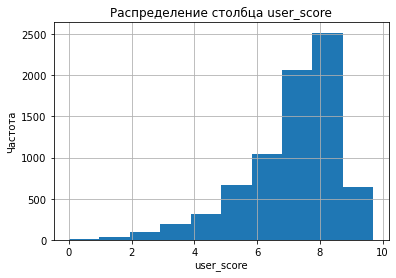

In [17]:
df['user_score'].plot(kind='hist');
plt.grid(True)
plt.figsize=(10, 6)
plt.title("Распределение столбца user_score")
plt.xlabel('user_score')
plt.ylabel('Частота')
plt.show()

**rating**

Видим, что у нас есть 8 возможных значений рейтинга. E (everyone) - все возраста, T (teen) - 13 лет и страше, M (mature) - 17 лет и старше, E10+ (everyone 10+) - 10 лет и старше, EC(every childhood) - 3 года и старше, K-A (kids to adults) - для всех, RP(rating pending) - рейтинг ожидается, AO(adults only) - 18 лет и старше.

Согласно классификации организации ESRB, рейтинг EC существовал до 2018 года и теперь приравнивается к E, рейтинг K-A существовал до 1998 года и тоже сейчас относится к E. Рейтинг RP - означает, что он еще не определен, думаю его можно заменить на NaN, так как фактически мы его не знаем. EC и K-A заменим на Е, так как, во-первых, их мало, во-вторых, они приравнены к более общей группе и в дальнейшем нам будет удобнее анализировать многочисленные группы, в них более вероятно какие-то тенденции увидеть.

В группе AO (adults only) только 1 значение, что не позволит нам сделать адекватный анализ этой группе. Если бы стояла такая задача, нужно было бы запросить коллег о данных на эту группу.

In [18]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [19]:
df.loc[(df['rating'] == 'K-A') | (df['rating'] == 'EC'), 'rating'] = 'E'
df.loc[df['rating'] == 'RP', 'rating'] = np.nan

Теперь выглядит лучше

In [20]:
df['rating'].value_counts()

E       4001
T       2961
M       1563
E10+    1420
AO         1
Name: rating, dtype: int64

**platform, genre, critic_score**

Посмотрим на столбцы platform, genre, critic_score

In [21]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [22]:
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

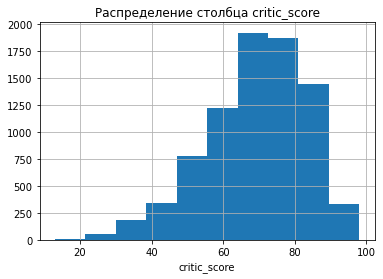

In [23]:
df['critic_score'].hist();
plt.grid(True)
plt.figsize=(10, 6)
plt.title("Распределение столбца critic_score")
plt.xlabel('critic_score')
plt.show()

In [24]:
df['critic_score'].min(), df['critic_score'].max()

(13.0, 98.0)

В платформах и жанрах выбивающихся значений нет. Рейтинг критингов распределен нормально.

**Продажи в разных регионах, создание столбца с общими продажами**

Данные по продажам в разных регионах выглядят адекватно. Видим Пуассоновское распределение с длинным правым хвотом. Огромное количество игр больших прибылей не приносит, поэтому есть пик около нуля. Единицы дают очень большие прибыли, поэтому распределение поползло вправо к милионным прибылям.

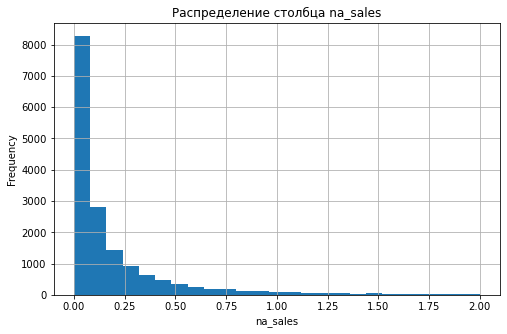

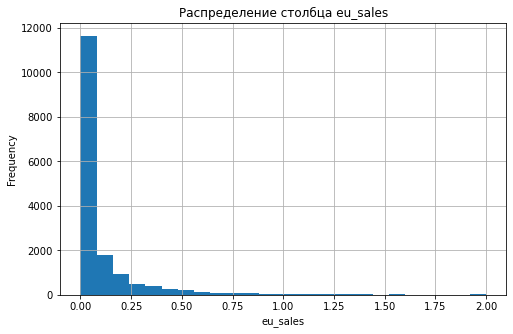

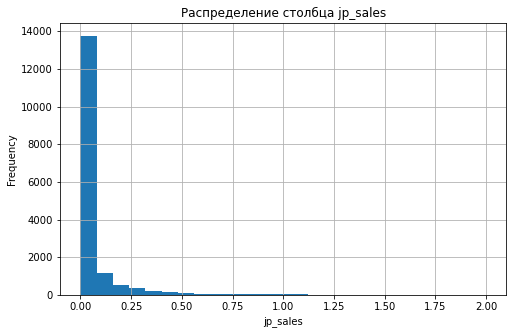

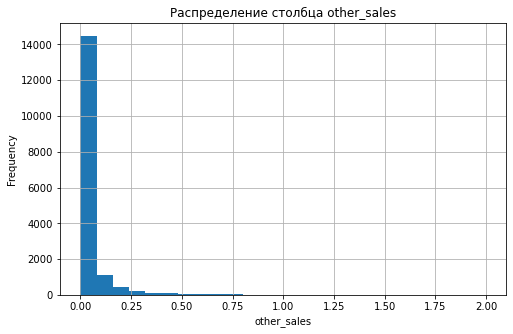

In [25]:
sales_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for column in sales_columns:
    df[column].plot(kind='hist', bins=25, range=(0, 2), figsize=(8,5))
    plt.grid(True)
    plt.title("Распределение столбца " + column)
    plt.xlabel(column)
    plt.show()

Создадим столбец с суммарными продажами во всех регионах

In [26]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Проверим, есть ли дублирующие строки

In [27]:
df.duplicated().sum()

0

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9946 non-null   object 
 11  all_sales        16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


#### ВЫВОД

Таким образом, в ходе предобработки данных проведены следующие действия:
- для удобства названия столбцов приведены к нижнему регистру;
- проанализированы пропуски в данных. Удалено 2 игры, у которых пропущены название и жанр. Также много пропусков в столбцах Critic_Score, User_Score, Rating. Их заменять на что бы то ни было считаю не корректным, так как эти столбцы необходимы нам для дальнейшего анализа и замены в них сильно исказят наши выводы;
- заменены типы данных в столбцах year_of_release (на целочисленный тип, год не может быть вещественным), user_score. В столбце user_score обнаружены строчки со значением "tbd", это означает "to be discussed" (будет обсуждаться), то есть в данный момент рейтинг не известен - заменили их на nan. Типданных заменили на float;
- в столбеце rating неактуальные значения рейтинга заменены на существующие на текущий момент;
- данные проверены на логику и здравый смысл;
- создан столбец с суммарными продажами во всех регионах.   

### Шаг 3. Исследовательский анализ данных

Видим, что в первые годы нашей выборки игр выпускалось совсем немного, их популярность только начинает зарождаться, бум игровой индустрии приходится на 2005-2011 гг, далее игр выпускается меньше, но они держатся на показателе 500-600 игр в год. Думаю для анализа 2016 года нам не показательны ранние годы, там вероятно совсем другие платформы и информация на сегодняшний день не актуальна.

In [29]:
df.groupby('year_of_release')['name'].count()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

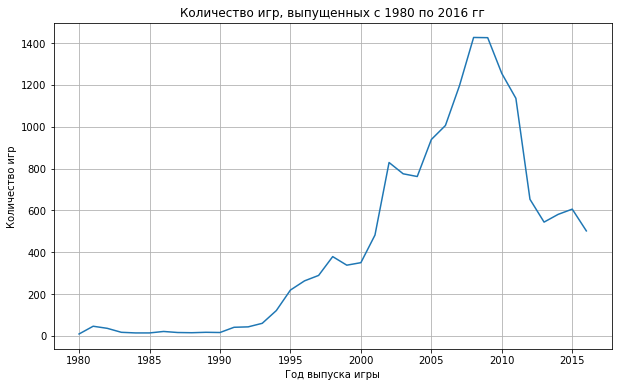

In [30]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count') \
  .plot(figsize=(10,6), legend=False)
plt.grid(True)
plt.title("Количество игр, выпущенных с 1980 по 2016 гг")
plt.xlabel("Год выпуска игры")
plt.ylabel("Количество игр")
plt.show()

Проанализируем информацию по платформам. Выделим топ-8 платформ с наибольшими суммарными продажами игр.

In [31]:
top_sales_platform = df.pivot_table(index='platform', values='all_sales', aggfunc='sum') \
                       .fillna(0) \
                       .sort_values(by='all_sales', ascending=False) \
                       .head(8).index
top_sales_platform

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4'], dtype='object', name='platform')

Создадим датафрейм, содержащий только выбранные нами 8 платформ. Построим распределение по ним по годам.

In [32]:
top_sales_platform_df = df.query('platform in @top_sales_platform')

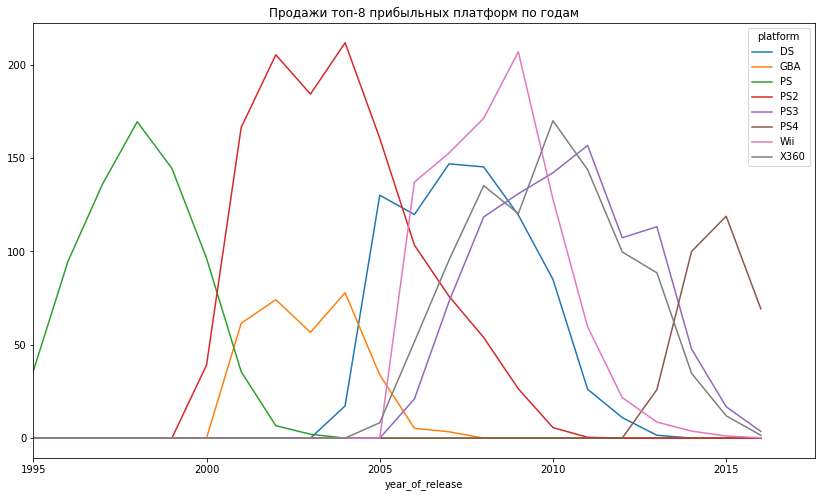

In [33]:
top_sales_platform_df.pivot_table(index='year_of_release', 
                                  columns='platform', 
                                  values='all_sales', 
                                  aggfunc='sum') \
                    .fillna(0) \
                    .plot(xlim=1995, 
                          figsize=(14,8),
                          title='Продажи топ-8 прибыльных платформ по годам');

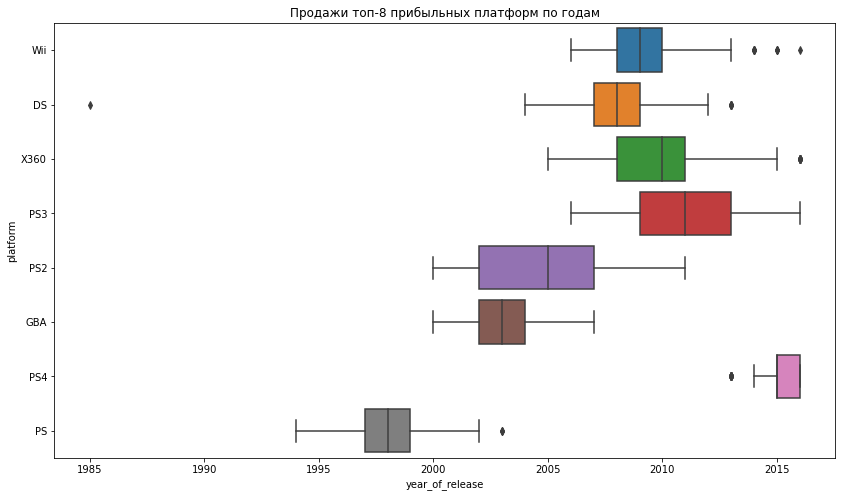

In [34]:
plt.figure(figsize=(14,8))
sns.boxplot(y='platform', x='year_of_release', data=top_sales_platform_df);
plt.title('Продажи топ-8 прибыльных платформ по годам')
plt.show()

По графикам видим, что в среднем одна игровая платформа "живёт" примерно 5-7 лет, дальше продажи от нее затихают и на смену приходят другие. Есть платформы, популярные около 10 лет. Соответсвенно для нашего 2017 года не имеет смысл анализировать данные по платформам, которые уже не доходны.

Актуальный период - последние 6 лет, то есть с 2011 по 2016 включительно. В 2011 г. появилось восьмое поколение игровых приставок, поэтому вероятно, что в 2017 году самыми прибыльными будут уже приставки 8-го поколения, 7-ое возможно еще будет приносить прибыль, но она будет падать, уступая место более современным играм. Создадим датафрейм, содержащий актуальный период. Помним, что мы заменяли пропуски в годе выпуска игр на 1979 год, эти данные также не попадут в нам датафрейм.

In [36]:
actual_df = df.query('year_of_release > 2010')

Посмотрим, какие платформы лидируют по продажам в актуальном периоде

In [37]:
actual_sales_for_platform = actual_df.pivot_table(index='platform', values='all_sales', aggfunc='sum') \
                                     .sort_values(by='all_sales', ascending=False)
actual_sales_for_platform

,all_sales
platform,
PS3,445.57
X360,380.38
PS4,314.14
3DS,257.81
XOne,159.32
PC,97.68
Wii,95.02
WiiU,82.19
PSV,53.81


Посмотрим на графике, как изменяются прибыли с актуальных платформ с 2011 года

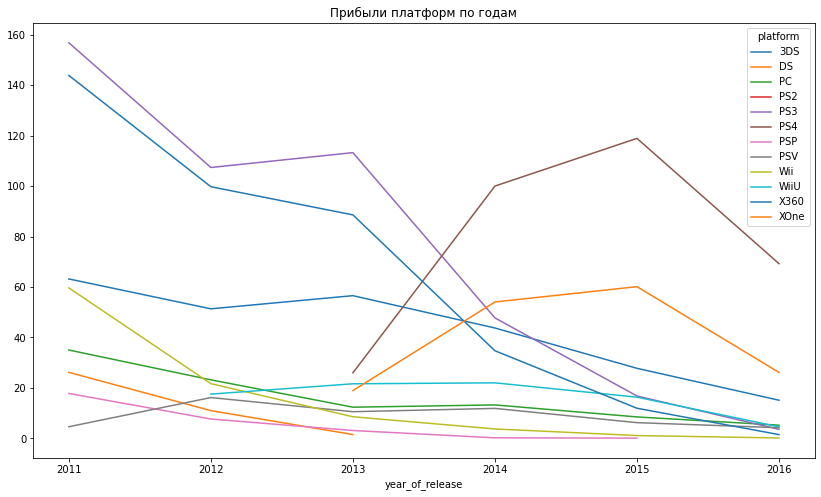

In [38]:
actual_df.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum') \
         .plot(figsize=(14,8), title='Прибыли платформ по годам');

Посмотрим ближе на платформы 'PS4', 'XOne', '3DS', 'PC', 'PSV', 'WiiU

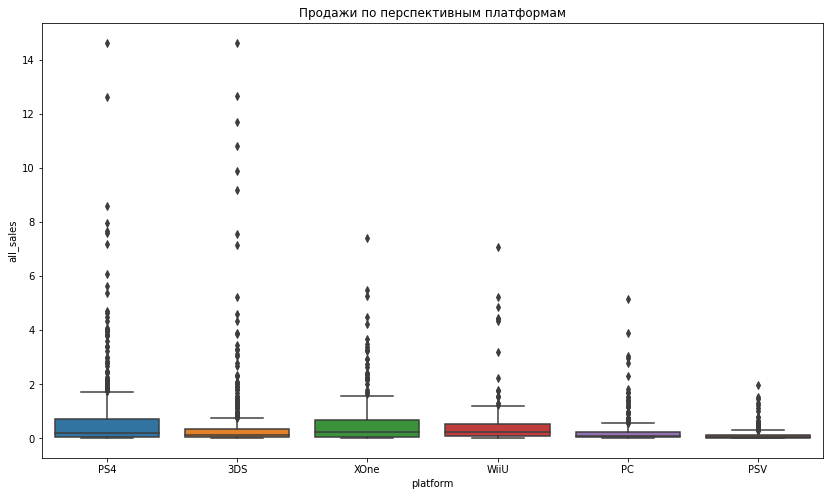

In [39]:
profited_platform= ['PS4', 'XOne', '3DS', 'PC', 'PSV', 'WiiU']
actual_top_sales_platform = actual_df.query('platform in @profited_platform')
plt.figure(figsize=(14,8))
sns.boxplot(x='platform', y='all_sales', data=actual_top_sales_platform);
plt.title('Продажи по перспективным платформам')
plt.show()

По продажам лидируют PS3, X360, PS4, XOne. Из них продажи резко падают у PS3, X360 (это платформы 7-го поколения). Платформы PS4, XOne (8 поколение платформ) тоже падают, но уже не так стремительно, довольно плавно и еще дают по последним годам выборки максимальные выручки производителям игр. Судя по графикам продажи на данных платформах еще несколько лет будут постепенно снижаться, пока не выйдет новое 9-ое поколение и даст всплеск продажам. Остальные платформы не имеют таких ярких пиков продаж, но все же дают неплохую выручку, их графики более горизонтальные, стабильные. Это 3DS, PC, Wii, WiiU.


В целом, как уже видно было ранее в 2005-2011 гг был пик игровой индустрии с максимальным количеством выпущенных игр и соответсвенно прибылей. Поэтому в периоде после 2011 г мы видим, что продажи всё же меньше предыдущего периода.

**Потенциально прибыльными в 2017 году можно считать PS4, XOne, 3DS. Менее прибыльными -  PC, PSV, WiiU**

Причем по ящику с усами видно, что у платформы 3DS много значений-выбросов по прибыли, хоть в среднем она приносит меньше прибыли, но есть очень популярные и прибыльные игры на данной платформе, XOne в этом параметре уступает.

Посмотрим, как влияют на продажи внутри платформы "PS4" отзывы пользователей и критиков. 

In [40]:
ps4_df = actual_df.query('platform == "PS4"')

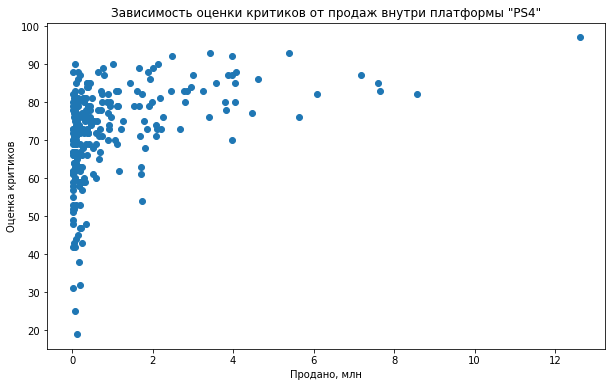

In [41]:
plt.figure(figsize=(10,6))
plt.title('Зависимость оценки критиков от продаж внутри платформы "PS4"')
plt.xlabel('Продано, млн')
plt.ylabel('Оценка критиков')
plt.scatter(ps4_df['all_sales'], ps4_df['critic_score']);
plt.show()

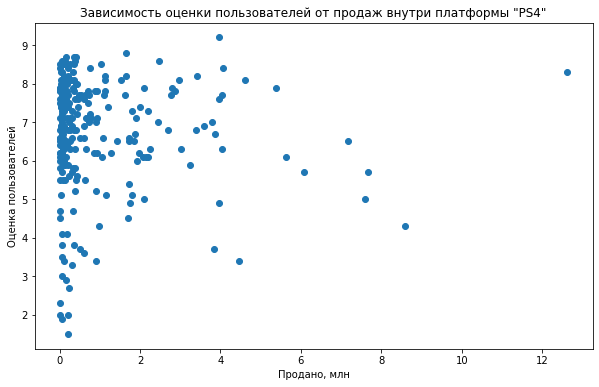

In [42]:
plt.figure(figsize=(10,6))
plt.title('Зависимость оценки пользователей от продаж внутри платформы "PS4"')
plt.xlabel('Продано, млн')
plt.ylabel('Оценка пользователей')
plt.scatter(ps4_df['all_sales'], ps4_df['user_score']);
plt.show()

Посмотрим на тепловую карту, показывающую корреляцию между имеющимися признаками нашего датафрейма, содержащего данные о платформе "PS4"

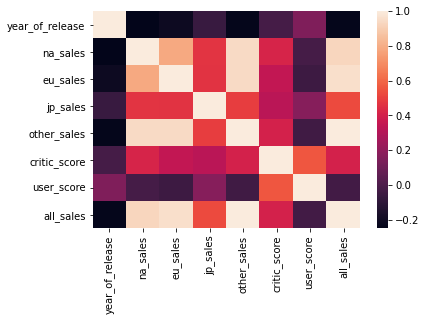

In [43]:
sns.heatmap(ps4_df.corr());

И на тепловую карту, показывающую корреляцию между имеющимися признаками всего датафрейма

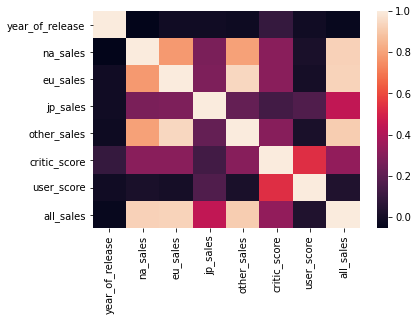

In [44]:
sns.heatmap(actual_df.corr());

Корреляция есть, но не очень сильная. Так как есть много игр с высоким рейтингом, но имеющие маленькую выручку. Возможно, это игры не для широкого круга пользователей. Они заслуживают любовь критиков, но пользователей, покупающих такие игры в процентном соотношении мало.
Отзывы критиков лучше коррелируют с продажами, чем отзывы пользователей. На диаграмме рассеяния отзывов пользователей и продаж точки нет четкого тренда, точки разбросаны по графику. Критикам можно доверять больше.

Что касается продажи игр на других платформах, видим, что корреляция между пользовательским рейтингом и продажами также отсутсвует, а корреляция между рейтингом критиков и продажами еще меньше.

In [45]:
ps4_df.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.021142,0.152447,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.415008,-0.020933,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.346720,-0.048925,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.322358,0.171332,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.409191,-0.035639,0.998051
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,1.000000,0.557654,0.406568
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957
all_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.406568,-0.031957,1.000000


In [46]:
actual_df.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.000000,-0.055772,-0.009561,-0.009525,-0.018231,0.096359,-0.009793,-0.033917
na_sales,-0.055772,1.000000,0.779714,0.273743,0.800580,0.308113,0.014490,0.927913
eu_sales,-0.009561,0.779714,1.000000,0.278540,0.944273,0.310098,0.003727,0.931263
jp_sales,-0.009525,0.273743,0.278540,1.000000,0.217382,0.129452,0.164133,0.446631
other_sales,-0.018231,0.800580,0.944273,0.217382,1.000000,0.303915,0.015248,0.915012
critic_score,0.096359,0.308113,0.310098,0.129452,0.303915,1.000000,0.534853,0.329977
user_score,-0.009793,0.014490,0.003727,0.164133,0.015248,0.534853,1.000000,0.031636
all_sales,-0.033917,0.927913,0.931263,0.446631,0.915012,0.329977,0.031636,1.000000


Посмотрим на общее распределение игр по жанрам

In [47]:
df.pivot_table(index='genre', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False)

,all_sales
genre,
Action,1744.17
Sports,1331.27
Shooter,1052.45
Role-Playing,934.56
Platform,827.77
Misc,802.51
Racing,728.67
Fighting,447.53
Simulation,389.97


Самые прибыльные жанры - Action, Sports, Shooter, Role-Playing, менее прибыльные - Puzzle, Adventure и Strategy. Видим, что есть жанры, которые больше других приковывают внимание пользователей, тем самых дающие большие прибыли их производителям.

#### ВЫВОД

Таким образом, в ходе исследовательского анализа данных сделаны следующие выводы.

В первые годы нашей выборки игр выпускалось совсем немного, их популярность только начинала зарождаться, бум игровой индустрии приходится на 2005-2011 гг, далее игр выпускается меньше, но они держатся на показателе 500-600 игр в год. В среднем одна игровая платформа прибыльна примерно 5-7 лет, дальше продажи от нее затихают и на смену приходят другие. Соответсвенно для анализа 2017 года не имеет смысл анализировать данные по платформам, которые уже не доходны, будем анализировать актуальный период с 2011 года.

По продажам с 2011 года лидируют PS3, X360, PS4, XOne. Из них продажи резко падают у PS3, X360 (это платформы 7-го поколения). Платформы PS4, XOne (8 поколение платформ) тоже падают, но уже не так стремительно, довольно плавно и еще дают по последним годам выборки максимальные выручки производителям игр. Остальные платформы не имеют таких ярких пиков продаж, но все же дают неплохую выручку, их графики более горизонтальные, стабильные. Это 3DS, PC, Wii, WiiU.

Потенциально прибыльными в 2017 году можно считать PS4, XOne, 3DS. Менее прибыльными - PC, PSV, WiiU


На продажи внутри платформы "PS4" отзывы пользователей не влияют. Корреляция между этими признаками отсутсвует. Между оценкой критиков и продажами корреляция есть, но не очень сильная. Так как есть много игр с высоким рейтингом, но имеющие маленькую выручку. Возможно, это игры не для широкого круга пользователей. Они заслуживают любовь критиков, но пользователей, покупающих такие игры в процентном соотношении мало. 
Что касается продажи игр на всех остальных платформах, корреляция между пользовательским рейтингом и продажами также отсутсвует, а корреляция между рейтингом критиков и продажами еще меньше.

Самые прибыльные жанры - Action, Sports, Shooter, Role-Playing, менее прибыльные - Puzzle, Adventure и Strategy. Видим, что есть жанры, которые больше других приковывают внимание пользователей, тем самых дающие большие прибыли их производителям.

### Шаг 4. Составление портрета пользователя каждого региона

**Определим для каждого региона (NA - Северная Америка, EU - Европа, JP - Япония) топ-5 самых популярных платформ.**

Исследование na_sales


,na_sales,percent
platform,,
X360,226.80,27.0
PS3,168.26,20.0
PS4,108.74,13.0
XOne,93.12,11.0
3DS,82.65,10.0


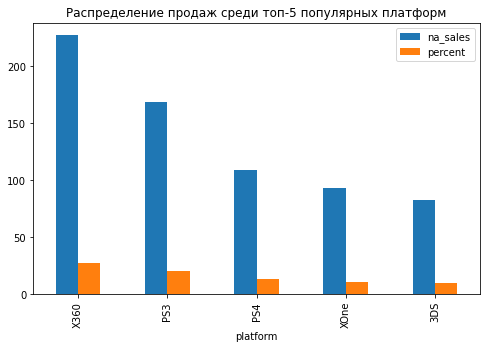

Исследование eu_sales


,eu_sales,percent
platform,,
PS3,163.10,24.0
PS4,141.09,21.0
X360,117.10,17.0
3DS,61.27,9.0
PC,56.70,8.0


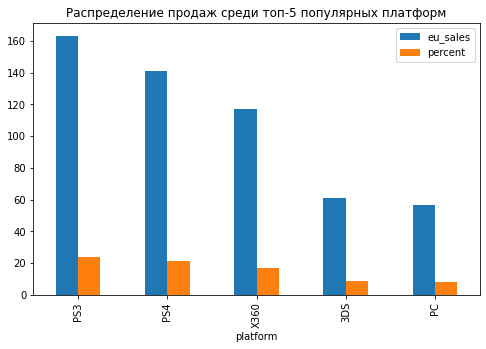

Исследование jp_sales


,jp_sales,percent
platform,,
3DS,100.62,41.0
PS3,49.39,20.0
PSP,24.04,10.0
PSV,21.84,9.0
PS4,15.96,6.0


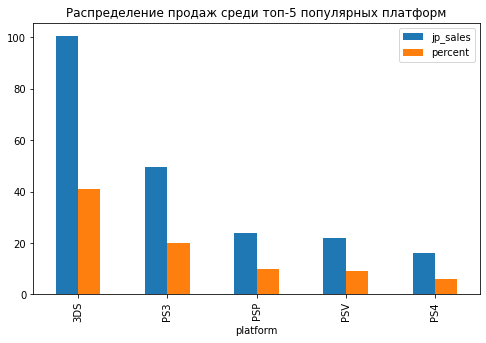

In [48]:
users_region_sales = ['na_sales', 'eu_sales', 'jp_sales']
for region in users_region_sales:
    print('Исследование', region)
    table = actual_df.pivot_table(index='platform', values=region, aggfunc='sum') \
                     .sort_values(by=region, ascending=False) \
                     .head(5)
    table['percent'] = round(table / actual_df[region].sum() * 100)
    display(table)
    table.plot(kind='bar', figsize=(8,5), title='Распределение продаж среди топ-5 популярных платформ')
    plt.show()

С 2011 по 2016 гг  в Северной Америке самыми прибыльными платформами являются X360 (приносит 27% прибыли), PS3 (20%), PS4 (13%), XOne (11) и 3DS (10%).
В Европе - PS3 (24%), PS4 (21%), X360 (17%), 3DS (9%) и PC (8%).
В Японии - 3DS (41%), PS3 (20%), PSP (10%), PSV (9%) и PS4 (6%).

Доли отличаются существенно. Если сравнивать Северную америку и Европу, то в Европе намного меньшей популярностью пользуются платформы компании Microsoft 17% против 38% в Северной Америке (соответсвенно Sony более популярна в Европе, чем в Северной Америке). Также американцы не жалуют персональный компьютер для игр, в Европе 8% прибыли приходит от данной платформы.

У японцев платформы компании Microsoft вообще не вошли в топ-5, они отдают предпочтение отечественным фирмам Sony и Nintendo.

**Теперь определим для каждого региона топ-5 самых популярных жанров.**

Исследование na_sales


,na_sales,percent
genre,,
Action,230.92,28.0
Shooter,194.43,23.0
Sports,108.70,13.0
Role-Playing,83.78,10.0
Misc,69.69,8.0


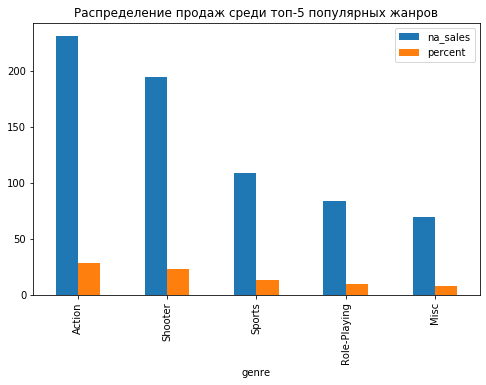

Исследование eu_sales


,eu_sales,percent
genre,,
Action,199.12,30.0
Shooter,148.02,22.0
Sports,88.48,13.0
Role-Playing,62.30,9.0
Racing,40.58,6.0


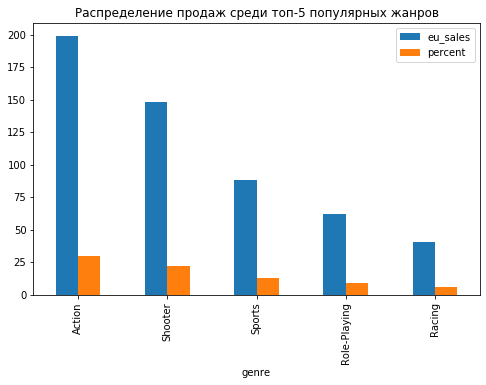

Исследование jp_sales


,jp_sales,percent
genre,,
Role-Playing,79.87,33.0
Action,63.62,26.0
Misc,17.60,7.0
Fighting,12.38,5.0
Platform,12.13,5.0


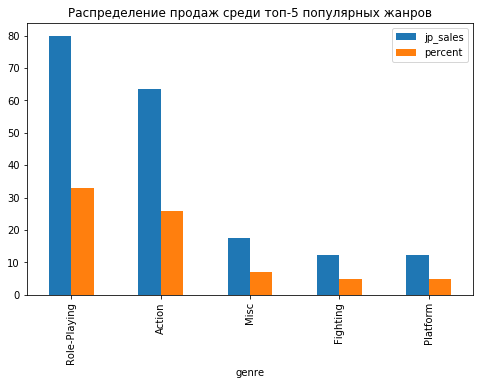

In [46]:
for region in users_region_sales:
    print('Исследование', region)
    table = actual_df.pivot_table(index='genre', values=region, aggfunc='sum') \
                     .sort_values(by=region, ascending=False) \
                     .head(5)
    table['percent'] = round(table / actual_df[region].sum() * 100)
    display(table)
    table.plot(kind='bar', figsize=(8,5), title='Распределение продаж среди топ-5 популярных жанров')
    plt.show()

Самые популярные жанры в Северной Америке - Action (экшен-игры, 28% пользователей их покупают), Shooter	(стрелялки, 23%), Sports (спортивные, 13%), Role-Playing (ролевые, 10%) и Misc (игры не вошедшие в другие группы, 8%). В Европе популярными жанрами являются - Action (30%), Shooter (22%), Sports (13%), Role-Playing (9%), Racing (гонки, 6%). Как видим, в целом ситуация очень похожа и в процентном соотношении, и в самих жанрах, за исключением последних игр, европейцы предпочитают Racing вместо Misc.
Что касается Японии, то здесь любимыми жанрами являются: Role-Playing (33%), Action (26%), Misc (7%), Fighting (борьба, 5%) и Platform (бродилки, 5%).
В Японии вкусы отличаются сильно. Превалируют ролевые игры в отличии от Северной Америки и Европы. Экшен-игры занимают такую же сильную позицию, но спортивные игры и гонки совсем не популярны. Вместо них японцы предпочитают борьбу и бродилки.


Таким образом, средний пользователь по всем трём странам отдаст предпочтение таким жанрам, как Action, Role-Playing, Shooter. Это самые прибыльные жанры.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

Исследование na_sales


,na_sales,percent
rating,,
All,706.07,85.0
M,308.45,37.0
E,170.59,21.0
E10+,117.72,14.0
T,109.31,13.0


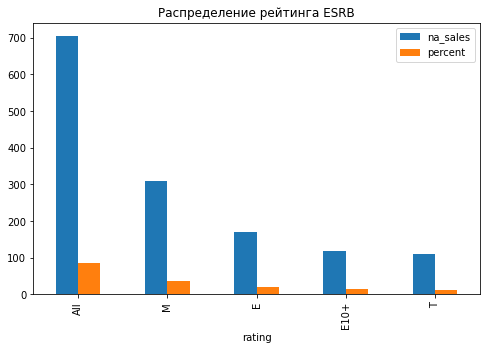

Исследование eu_sales


,eu_sales,percent
rating,,
All,553.15,83.0
M,250.26,37.0
E,141.73,21.0
T,83.16,12.0
E10+,78.00,12.0


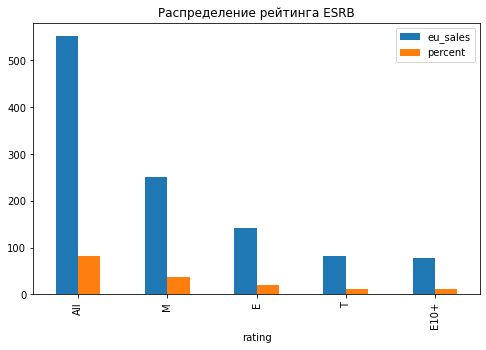

Исследование jp_sales


,jp_sales,percent
rating,,
All,107.44,44.0
E,36.68,15.0
T,33.39,14.0
M,26.14,11.0
E10+,11.23,5.0


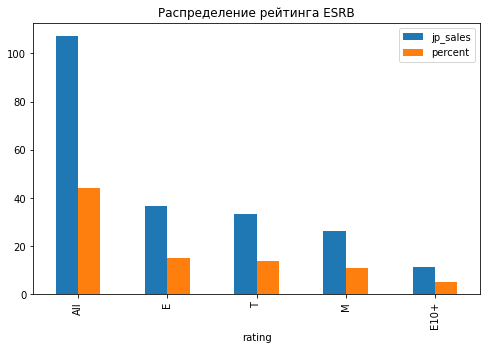

In [49]:
for region in users_region_sales:
    print('Исследование', region)
    table = actual_df.pivot_table(index='rating', values=region, aggfunc='sum', margins=True) \
                     .sort_values(by=region, ascending=False)
    table['percent'] = round(table / actual_df[region].sum() * 100)
    display(table)
    table.plot(kind='bar', figsize=(8,5), title='Распределение рейтинга ESRB')
    plt.show()

По графику визуально видно, что принципиального различия в вопросе рейтинга ESRB нет. Чаще всего покупают игры с рейтингом M и E (в сумме почти в 60% случаев), далее идут E10+ и T. Всего около 85% игр в Северной Америке и Европе имеют рейтинг ESRB. А вот Япония и здесь отличается. В сумме только 44% всех игр обладают рейтингом. Тут 2 предположения: либо в Японии есть своя огранизация, рейтингующая игры и поэтому японцы не маркируют игры американскими рейтингами, либо в Японии законодательство на этот счет не такое строгое и за рейтингами игр пристально правительство не следит.
В Европе и США более популярны игры для взрослых, в Японии же основная аудитория - подростки.

#### ВЫВОД

Таким образом:
- Топ-5 популярных платформ и доли их пользователей отличаются существенно в каждом из рассмотренных регионов (Северная Америка, Европа и Япония). Если сравнивать Северную америку и Европу, то в Европе намного меньшей популярностью пользуются платформы компании Microsoft, чем в Северной Америке (соответсвенно Sony более популярна в Европе, чем в Северной Америке). Также американцы не жалуют персональный компьютер для игр, в Европе 8% прибыли приходит от данной платформы. У японцев платформы компании Microsoft вообще не вошли в топ-5, они отдают предпочтение отечественным фирмам Sony и Nintendo. То есть только в Америке платформы Microsoft наиболее популярны.
- В целом ситуация в Северной Америке и Европе по популярным жанрам очень похожа и в процентном соотношении, и в самих наименованиях жанров. Топ-4 жанров - Action, Shooter, Sports, Role-Playing. 5-ый по популярности жанр в Северной Америке и Европе отличается: Misc и Racing сооветственно. Что касается Японии, то здесь любимыми жанрами являются: Role-Playing, Action, Misc, Fighting и Platform. Видим, что в Японии вкусы отличаются сильно. Превалируют ролевые игры в отличии от Северной Америки и Европы. Экшен-игры занимают такую же сильную позицию, но спортивные игры и гонки совсем не популярны. Вместо них японцы предпочитают борьбу и бродилки. Таким образом, средний пользователь по всем трём странам отдаст предпочтение таким жанрам, как Action, Role-Playing, Shooter. Это самые прибыльные жанры.
- Что касается рейтинга ESRB, то в Северной Америке и Европе принципиального различия в этом вопросе нет. Чаще всего покупают игры с рейтингом M и E (в сумме почти в 60% случаев), далее идут E10+ и T. Всего около 85% игр в Северной Америке и Европе имеют рейтинг ESRB. А вот в Японии совсем иная ситуация. В сумме только 44% всех игр обладают рейтингом. Тут 2 предположения: либо в Японии есть своя огранизация, рейтингующая игры и поэтому японцы не маркируют игры американскими рейтингами, либо в Японии законодательство на этот счет не такое строгое и за рейтингами игр пристально правительство не следит.

### Шаг 5. Проверка гипотез

***Гипотеза о платформах.***

Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC не различаются.
Альтернативная гипотеза - в средних пользовательских рейтингах имеются различия.

Нулевая гипотеза сформулирована со знаком равенства, то есть значения лежат там, где ожидаем их найти. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind, порог для p-value возьмем стандартный - 0.05

Выделим 2 массива, соответсвующих пользовательским рейтингам платформ Xbox One и PC, удалим из них пропущенные значения, посчитаем дисперсию каждой выборки 

In [50]:
alpha = 0.05
array1_platform = actual_df.query('platform == "XOne"')['user_score'].dropna()
array2_platform = actual_df.query('platform == "PC"')['user_score'].dropna()
print('Дисперсия выборки array1_platform = {:.2f}, \
       дисперсия выборки array2_platform = {:.2f}'.format(array1_platform.var(), array2_platform.var()))

Дисперсия выборки array1_platform = 1.91,        дисперсия выборки array2_platform = 2.60


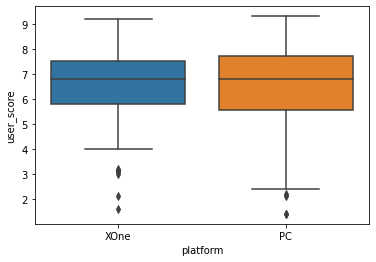

In [51]:
data_platform = actual_df.query('platform == "XOne" or platform == "PC"')
sns.boxplot(x='platform', y='user_score', data=data_platform)

Дисперсии выборок различаются более, чем на 5%, следовательно, укажем это в параметре equal_var

In [52]:
array2_platform.var() / array1_platform.var()

1.3614578383562224

In [53]:
results = st.ttest_ind(array1_platform, array2_platform, equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.6130712247638477
Не получилось отвергнуть нулевую гипотезу


#### ВЫВОД

Полученное значение p-value говорит о том, что хотя платформы Xbox One и PC различаются по средним пользовательским рейтингам, при соблюдении условий нулевой гипотезы вероятность получить такие и большие различия составляет в около 61%. У нас недостаточно оснований отклонить нулевую гипотезу. Наши данные согласуются с нулевой гипотезой.


***Гипотеза о жанрах.***

Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports не различаются.
Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза сформулирована со знаком равенства, то есть значения лежат там, где ожидаем их найти. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind, порог для p-value возьмем стандартный - 0.05

Аналогично, создадим 2 массива с необходимыми данными, содержащими пользовательские рейтинги жанров Action и Sports, посчитаем дисперсию, видим, что она сильно различается, укажем это при проведении стат.теста

In [54]:
alpha = 0.05
array1_genre = actual_df.query('genre == "Action"')['user_score'].dropna()
array2_genre = actual_df.query('genre == "Sports"')['user_score'].dropna()
print('Дисперсия выборки array1_genre = {:.2f}, \
      дисперсия выборки array2_genre = {:.2f}'.format(array1_genre.var(), array2_genre.var()))

Дисперсия выборки array1_genre = 1.81,       дисперсия выборки array2_genre = 2.88


In [55]:
array2_genre.var() / array1_genre.var()

1.590896911881695

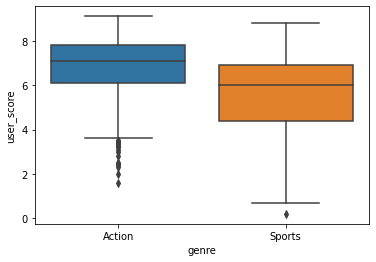

In [56]:
data_genre = actual_df.query('genre == "Action" or genre == "Sports"')
sns.boxplot(x='genre', y='user_score', data=data_genre)

In [57]:
results = st.ttest_ind(array1_genre, array2_genre, equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 8.285648549432565e-19
Отвергаем нулевую гипотезу


#### ВЫВОД

Значение p-value очень близко к 0. То есть средние пользовательские рейтинги жанров Action и Sports различается в генеральной совокупности. И данные различия не случайны.

### Шаг 6. Общий вывод по проекту

Таким образом, в ходе проекта сделаны следующие шаги.

1. При первичном изучении данных увидели, что в нашем распоряжении данные о почти 17 тыс игр. Мы знаем платформу, для которой игра выпущена, год выпуска, жанр, где она и в каком количестве продана, оценку критиков и пользователей, рейтинг от организации ESRB. Данные содержат пропуски в столбцах: Year_of_Release, Critic_Score, User_Score, Rating. Не везде указан правильный тип данных. Названия столбцов нужно привести к нижнему регистру, чтобы было удобно к ним обращаться.


2. В ходе предобработки проведено следующее:

    - названия столбцов приведены к нижнему регистру;
    - проанализированы пропуски в данных. Удалено 2 игры, у которых пропущены название и жанр. Пропущенные годы выпуска игр оставлены, так как их замена не корректна. Также много пропусков в столбцах Critic_Score, User_Score, Rating. Их заменять на что бы то ни было считаю не корректным, так как эти столбцы необходимы нам для дальнейшего анализа и замены в них сильно исказят наши выводы;
    - заменены типы данных в столбцах year_of_release (на целочисленный тип, год не может быть вещественным), user_score. В столбце user_score обнаружены строчки со значением "tbd", это означает "to be discussed" (будет обсуждаться), то есть в данный момент рейтинг не известен - заменили их на nan. Типданных заменили на float;
    - в столбеце rating неактуальные значения рейтинга заменены на существующие на текущий момент;
    - данные проверены на логику и здравый смысл;
    - создан столбец с суммарными продажами во всех регионах.   


3. В ходе исследовательского анализа данных обнаружено:
    - В первые годы нашей выборки игр выпускалось совсем немного, их популярность только начинала зарождаться, бум игровой индустрии приходится на 2005-2011 гг, далее игр выпускается меньше, но они держатся на показателе 500-600 игр в год. В среднем одна игровая платформа прибыльна примерно 5-7 лет, дальше продажи от нее затихают и на смену приходят другие. Соответсвенно для анализа 2017 года не имеет смысл анализировать данные по платформам, которые уже не доходны, будем анализировать актуальный период с 2011 года.
    - По продажам с 2011 года лидируют PS3, X360, PS4, XOne. Из них продажи резко падают у PS3, X360 (это платформы 7-го поколения). Платформы PS4, XOne (8 поколение платформ) тоже падают, но уже не так стремительно, довольно плавно и еще дают по последним годам выборки максимальные выручки производителям игр. Остальные платформы не имеют таких ярких пиков продаж, но все же дают неплохую выручку, их графики более горизонтальные, стабильные. Это 3DS, PC, Wii, WiiU.
    - Потенциально прибыльными в 2017 году можно считать PS4, XOne, 3DS. Менее прибыльными - PC, PSV, WiiU
    - На продажи внутри платформ отзывы пользователей не влияют. Корреляция между этими признаками отсутсвует. Между оценкой критиков и продажами корреляция есть, но не очень сильная. Так как есть много игр с высоким рейтингом, но имеющие маленькую выручку. Возможно, это игры не для широкого круга пользователей. Они заслуживают любовь критиков, но пользователей, покупающих такие игры, в процентном соотношении мало. 
    - Самые прибыльные жанры - Action, Sports, Shooter, Role-Playing, менее прибыльные - Puzzle, Adventure и Strategy. Видим, что есть жанры, которые больше других приковывают внимание пользователей, тем самых дающие большие прибыли их производителям.


4. Составлен портрет пользователя каждого региона (Северная Америка, Европа и Япония). Среднестатистический американец играет на платформах X360, PS3, PS4, XOne или 3DS, предпочитает жанры Action, Shooter, Sports, Role-Playing, Misc, выбирает возрастную категорию 17 лет и старше или все возраста. Среднестатистический европеец похож на американца, но он реже покупает игры на платформах компании Microsoft и иногда предпочитает играть на персональном компьютере. Жанры также схожи, только вместо Misc выбирает Racing. Среднестатистический японец сильно отличается от американца и европейца. Не играет на платформах Microsoft, предпочитает отечественные компании Sony и Nintendo, в жанрах превалируют ролевые игры, экшен-игры занимают такую же сильную позицию, но спортивные игры и гонки совсем не популярны. Вместо них японцы предпочитают борьбу и бродилки. Что касается рейтинга ESRB, в Японии в сумме только 44% всех игр обладают рейтингом (в Северной америке и Европе около 85%). Тут 2 предположения: либо в Японии есть своя огранизация, рейтингующая игры и поэтому японцы не маркируют игры американскими рейтингами, либо в Японии законодательство на этот счет не такое строгое и за рейтингами игр пристально правительство не следит.


5. Проверены следующие гипотезы:
    - Гипотеза о платформах. Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC не различаются. Альтернативная гипотеза - в средних пользовательских рейтингах имеются различия. Нулевая гипотеза сформулирована со знаком равенства, то есть значения лежат там, где ожидаем их найти. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind, порог для p-value возьмем стандартный - 0.05. Полученное значение p-value (0.61) говорит о том, что хотя платформы Xbox One и PC различаются по средним пользовательским рейтингам, при соблюдении условий нулевой гипотезы вероятность получить такие и большие различия составляет в около 61%. У нас недостаточно оснований отклонить нулевую гипотезу. Наши данные согласуются с нулевой гипотезой.
    - Гипотеза о жанрах. Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports не различаются. Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports разные. Проверка гипотезы аналогичная. Значение p-value очень близко к 0. То есть средние пользовательские рейтинги жанров Action и Sports различается в генеральной совокупности. И данные различия не случайны.